# Customer Data Clustering :-

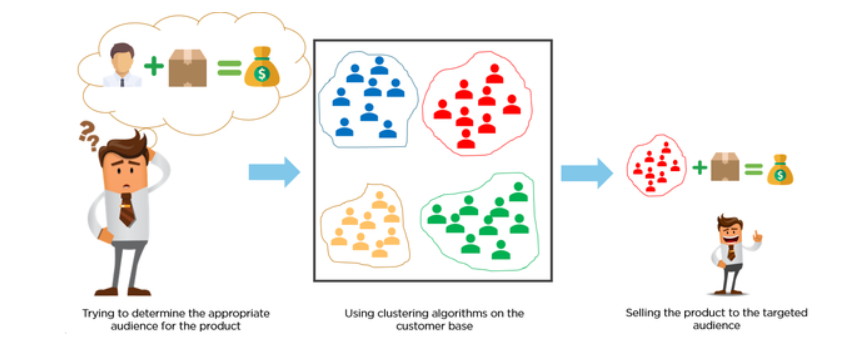

In [1]:
from IPython import display
display.Image("C:\\Users\\Rohan\\Desktop\\Clustering.png")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statistics
import statsmodels
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
df=pd.read_csv("E:\\Data Source\\segmentation data.csv")
df

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47,1,123525,0,0
1996,100001997,1,1,27,1,117744,1,0
1997,100001998,0,0,31,0,86400,0,0
1998,100001999,1,1,24,1,97968,0,0


In [4]:
df.shape

(2000, 8)

In [5]:
df.duplicated().sum()

0

In [6]:
df.isnull().sum()

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

In [7]:
df.drop(['ID'],axis=1,inplace=True)
df

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,67,2,124670,1,2
1,1,1,22,1,150773,1,2
2,0,0,49,1,89210,0,0
3,0,0,45,1,171565,1,1
4,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0
1996,1,1,27,1,117744,1,0
1997,0,0,31,0,86400,0,0
1998,1,1,24,1,97968,0,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Sex              2000 non-null   int64
 1   Marital status   2000 non-null   int64
 2   Age              2000 non-null   int64
 3   Education        2000 non-null   int64
 4   Income           2000 non-null   int64
 5   Occupation       2000 non-null   int64
 6   Settlement size  2000 non-null   int64
dtypes: int64(7)
memory usage: 109.5 KB


In [9]:
df.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


## Distribution

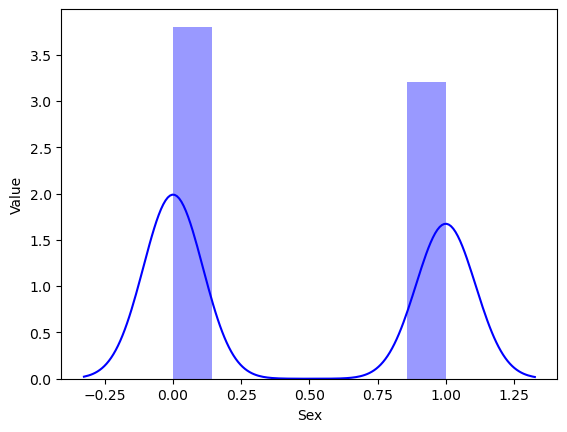

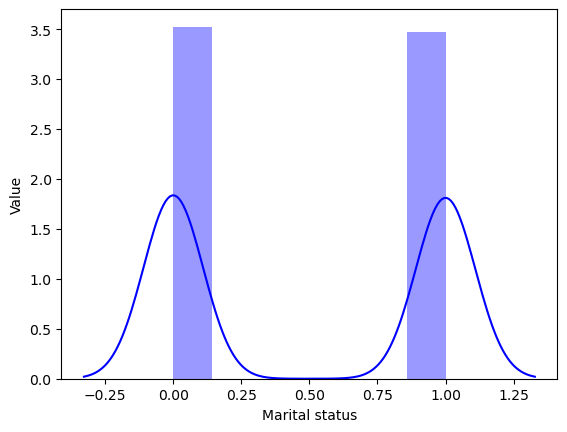

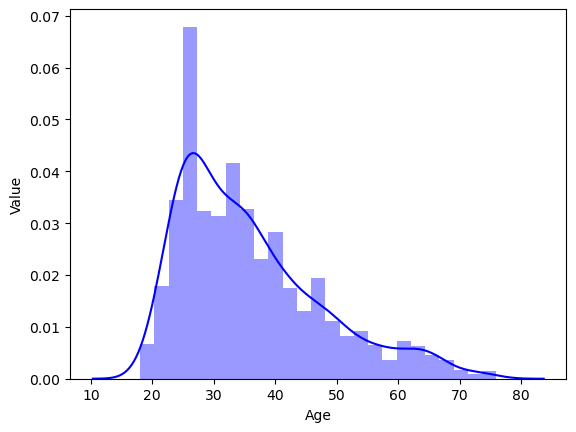

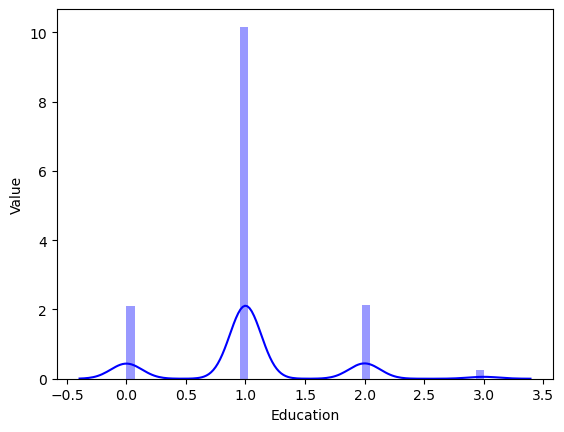

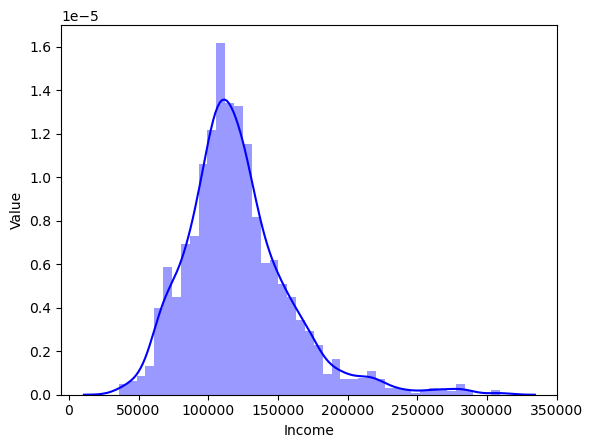

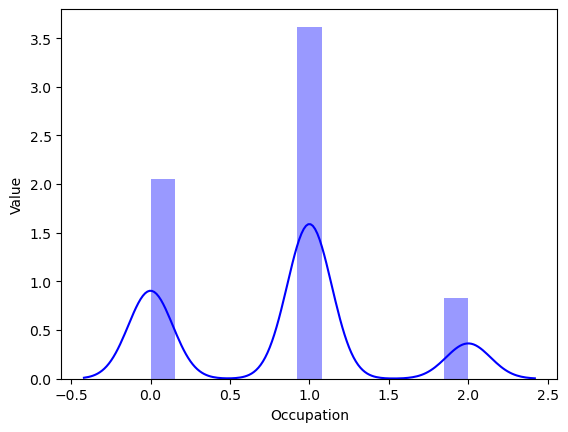

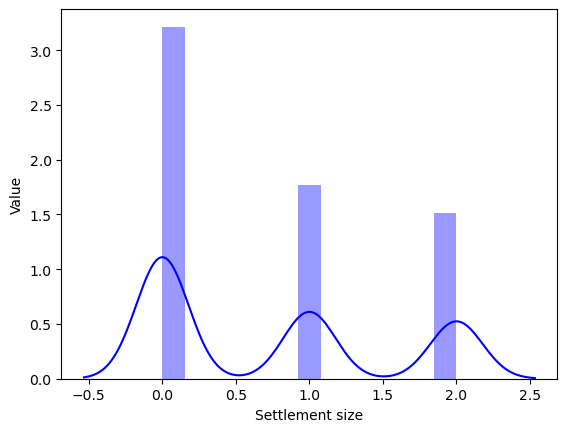

In [10]:
for d in df.columns:
    sns.distplot(df[d],color='blue')
    plt.xlabel(d)
    plt.ylabel('Value')
    plt.show()

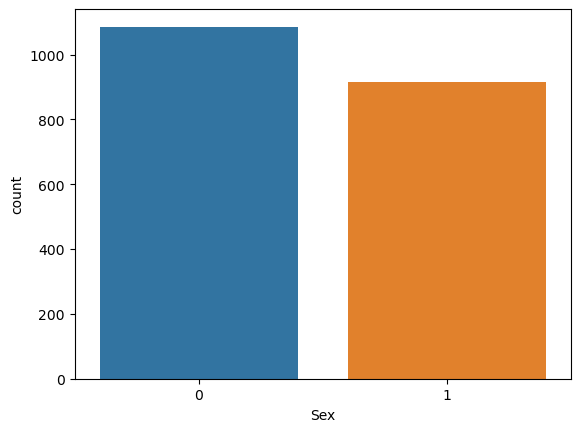

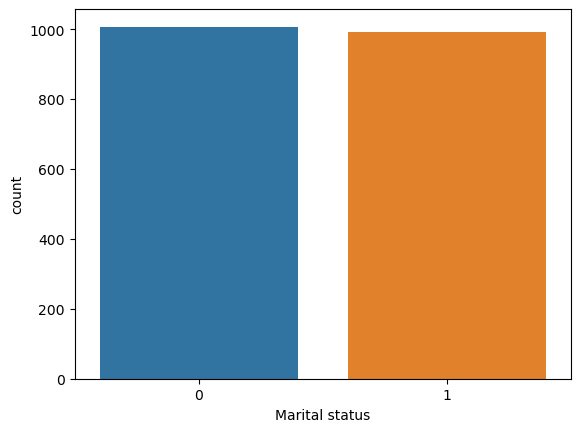

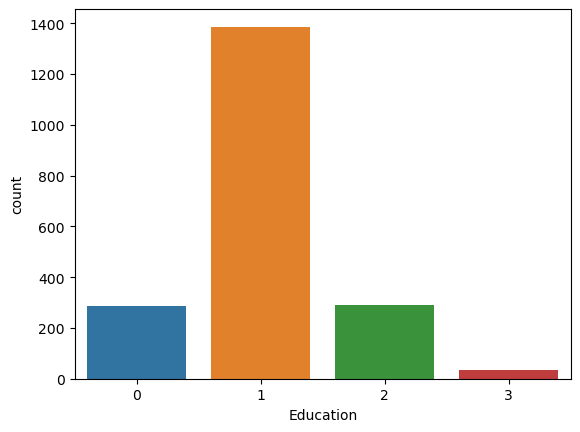

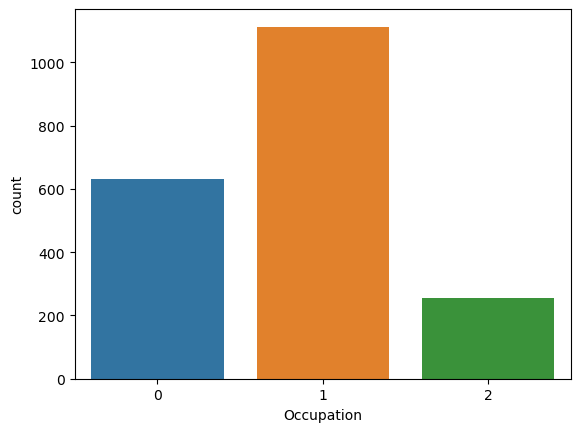

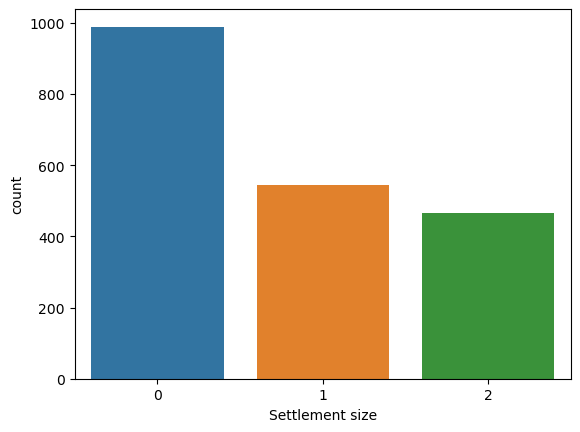

In [11]:
for i in df.columns:
    if df[i].nunique()<=10:
        sns.countplot(data=df,x=i)
        plt.show()

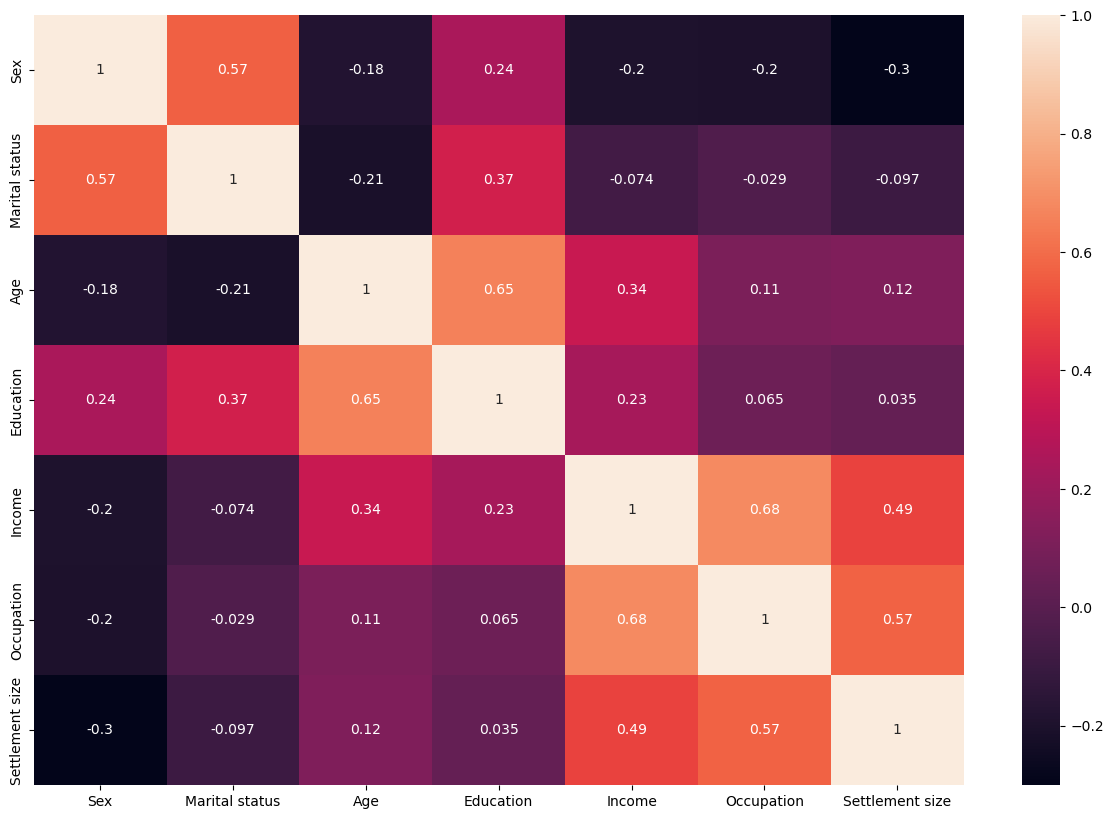

In [12]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

## VIF

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame({'Columns':df.columns})
vif['VIF']=[variance_inflation_factor(df.values,r)
           for r in range(len(df.columns))]
vif

,Columns,VIF
0,Sex,2.871687
1,Marital status,3.784896
2,Age,19.777860
3,Education,10.838182
4,Income,19.441969
5,Occupation,5.733379
6,Settlement size,2.947743


## Outlire

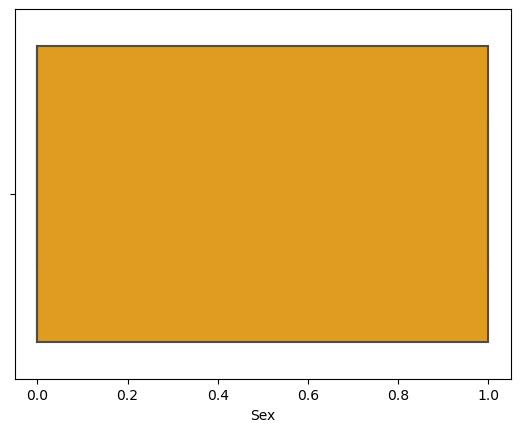

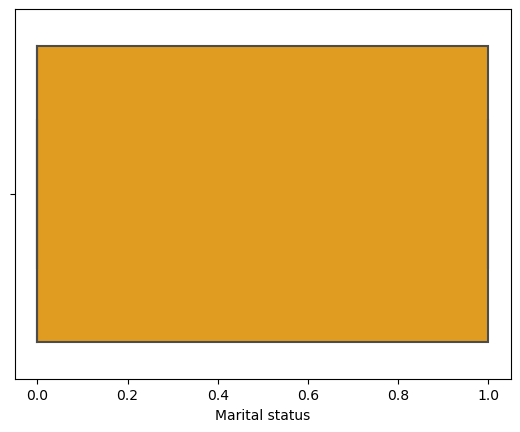

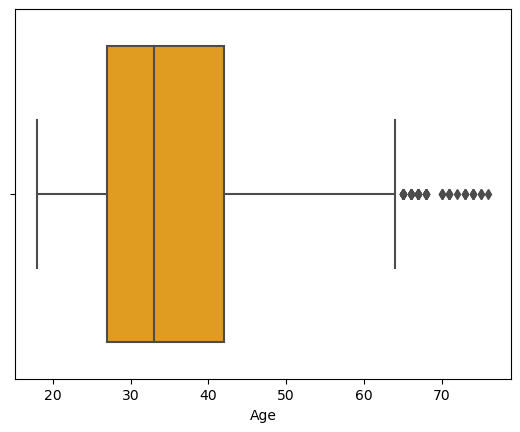

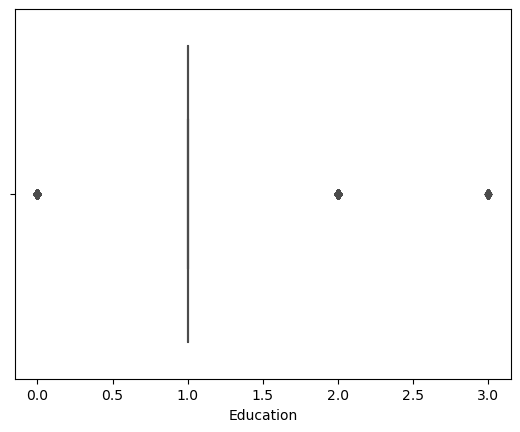

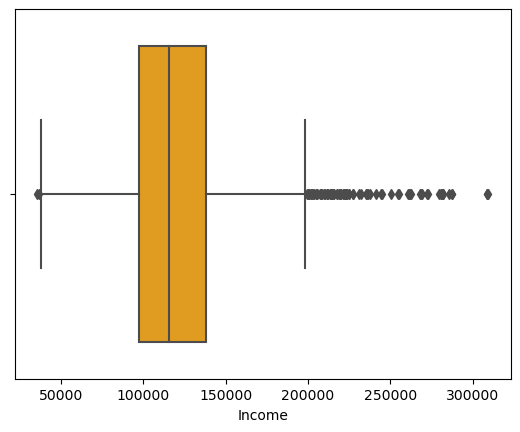

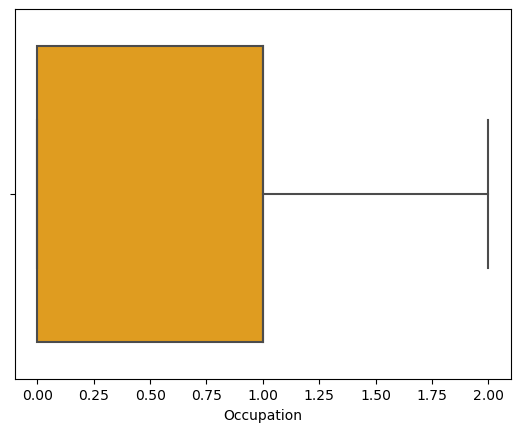

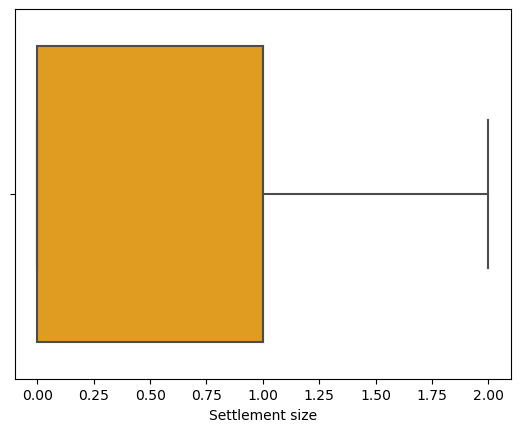

In [14]:
for o in df.columns:
    sns.boxplot(data=df,x=o,color='orange')
    plt.show()

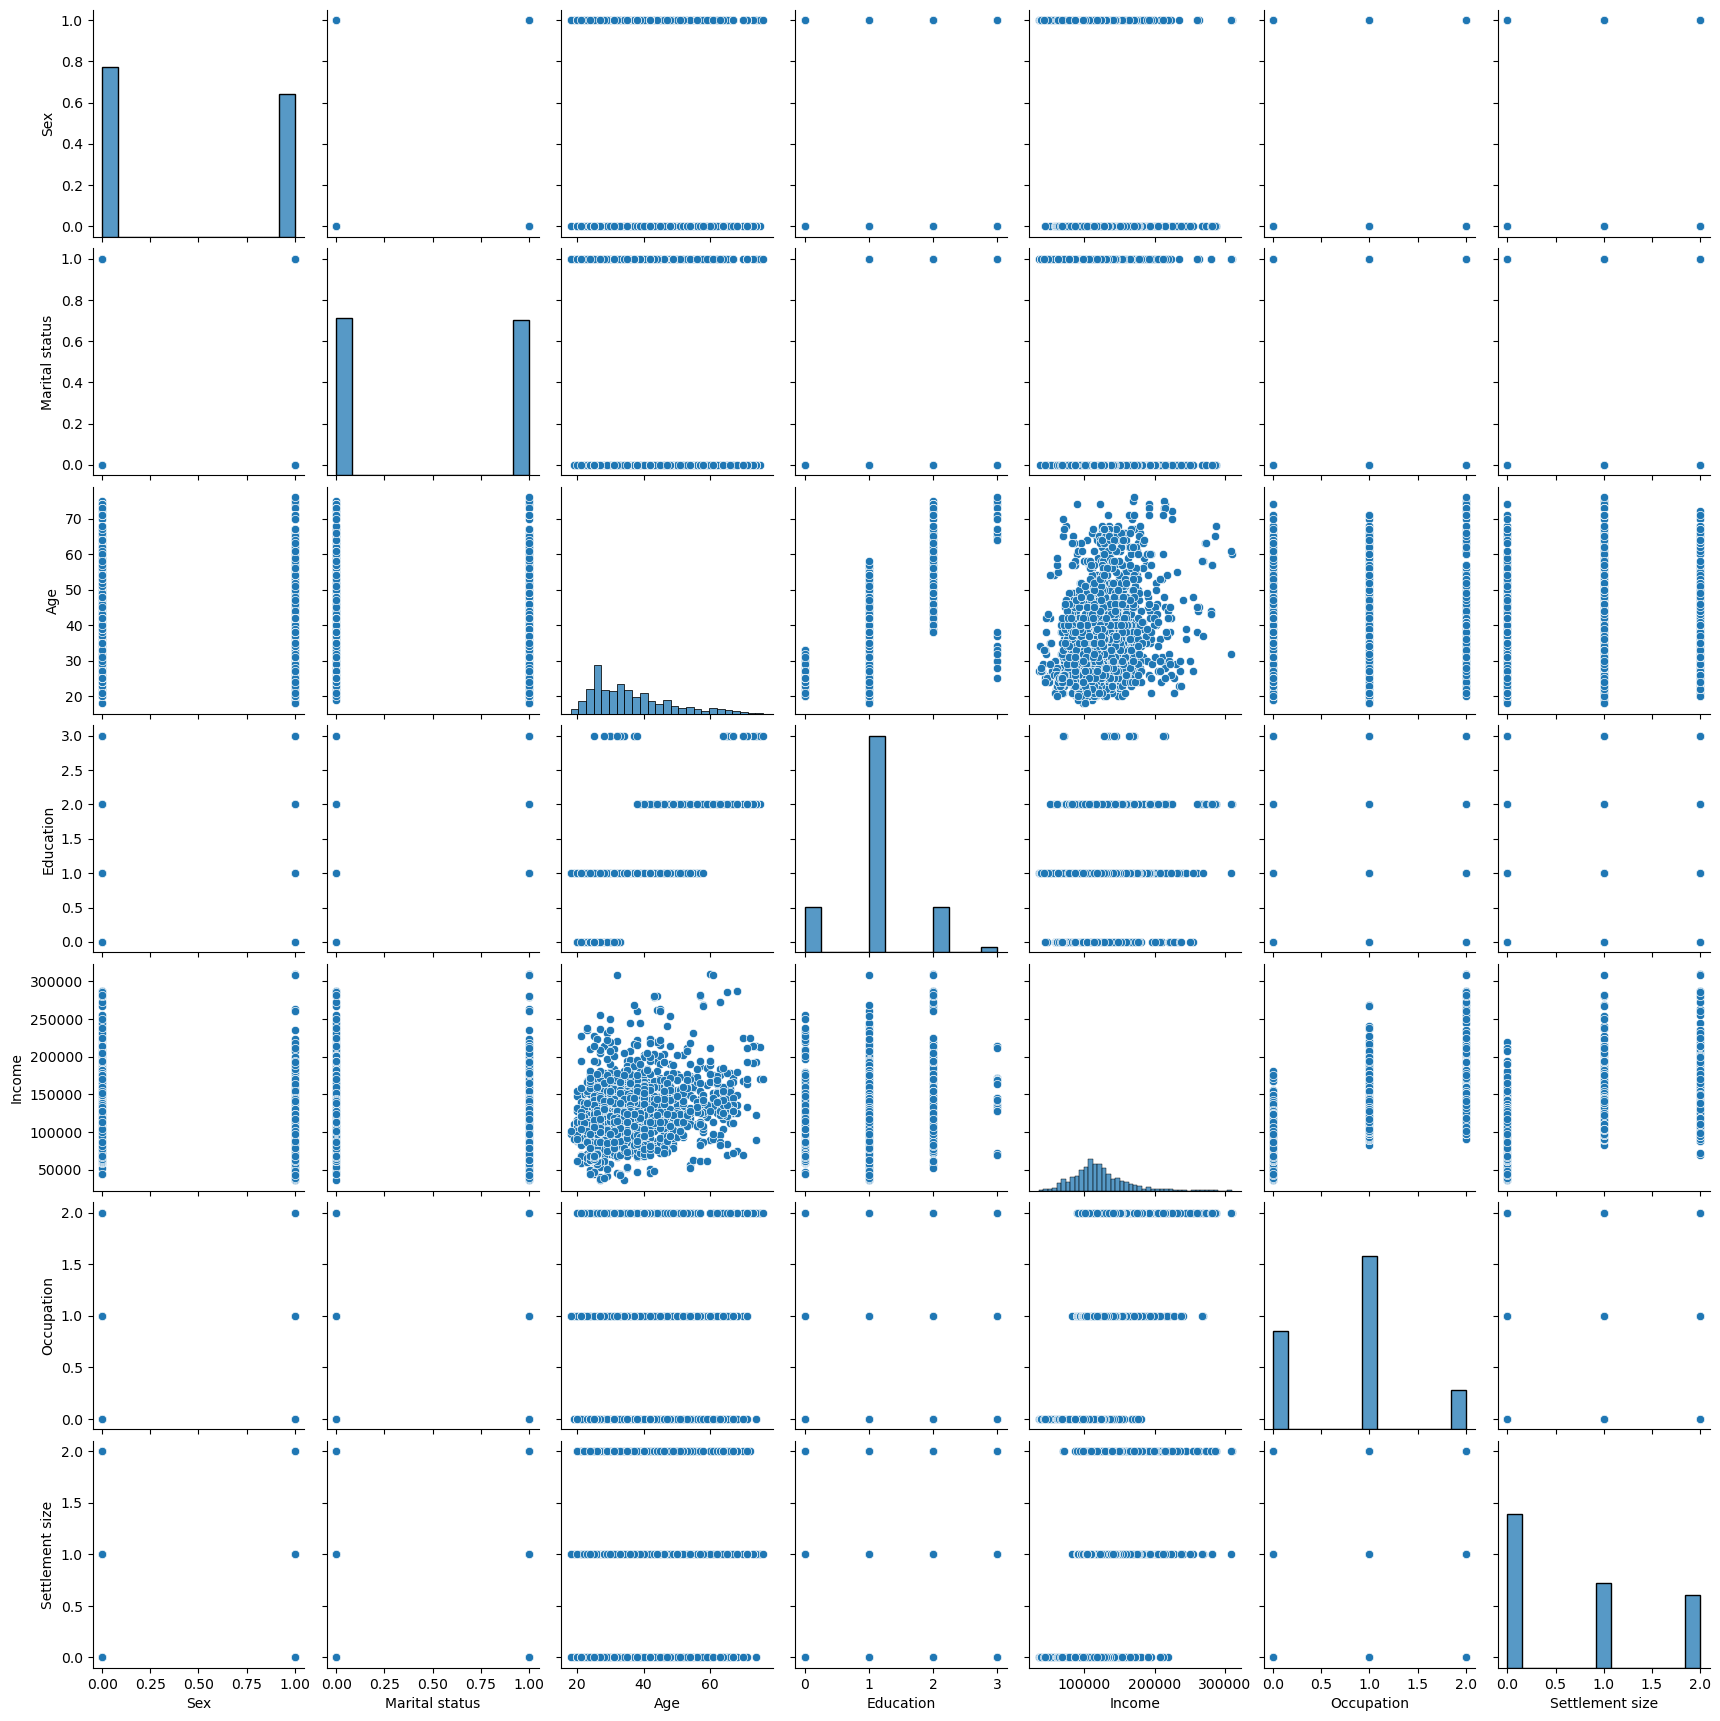

In [15]:
sns.pairplot(df)

In [16]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
df2=pd.DataFrame(std.fit_transform(df))
df2.columns=df.columns
df2

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,-0.917399,-0.993024,2.653614,1.604323,0.097524,0.296823,1.552326
1,1.090038,1.007025,-1.187132,-0.063372,0.782654,0.296823,1.552326
2,-0.917399,-0.993024,1.117316,-0.063372,-0.833202,-1.269525,-0.909730
3,-0.917399,-0.993024,0.775916,-0.063372,1.328386,0.296823,0.321298
4,-0.917399,-0.993024,1.458716,-0.063372,0.736932,0.296823,0.321298
...,...,...,...,...,...,...,...
1995,1.090038,-0.993024,0.946616,-0.063372,0.067471,-1.269525,-0.909730
1996,1.090038,1.007025,-0.760382,-0.063372,-0.084265,0.296823,-0.909730
1997,-0.917399,-0.993024,-0.418983,-1.731068,-0.906957,-1.269525,-0.909730
1998,1.090038,1.007025,-1.016432,-0.063372,-0.603329,-1.269525,-0.909730


In [17]:
from sklearn.decomposition import PCA
pca=PCA()
pc=pd.DataFrame(pca.fit_transform(df2),columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7'])
pc

,pc1,pc2,pc3,pc4,pc5,pc6,pc7
0,2.514746,0.834122,2.174806,1.217794,-0.677176,-0.472056,-0.191457
1,0.344935,0.598146,-2.211603,0.548385,-0.706269,0.703638,0.251703
2,-0.651063,-0.680093,2.280419,0.120675,0.166480,0.049468,-0.286729
3,1.714316,-0.579927,0.730731,-0.510753,0.044448,0.563451,-0.015546
4,1.626745,-0.440496,1.244909,-0.231808,-0.094499,0.103431,-0.480099
...,...,...,...,...,...,...,...
1995,-0.866034,0.298330,1.438958,-0.945916,-1.159023,0.560826,-0.236646
1996,-1.114957,0.794727,-1.079871,-0.736766,0.264667,-0.229442,-0.030549
1997,-1.452298,-2.235937,0.896571,-0.131774,0.190536,0.344249,-0.420874
1998,-2.241453,0.627108,-0.530456,-0.042606,0.048526,0.562745,0.152089


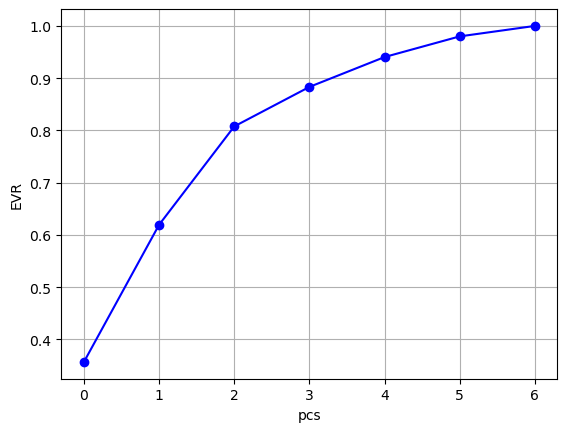

In [18]:
plt.plot(np.cumsum(pca.explained_variance_ratio_),color='blue',marker='o')
plt.xlabel('pcs')
plt.ylabel('EVR')
plt.grid()
plt.show()

In [19]:
pca1=PCA(n_components=4)
pc1_df=pd.DataFrame(pca1.fit_transform(df2))
pc1_df.columns=pc.iloc[:,0:4].columns
pc1_df

,pc1,pc2,pc3,pc4
0,2.514746,0.834122,2.174806,1.217794
1,0.344935,0.598146,-2.211603,0.548385
2,-0.651063,-0.680093,2.280419,0.120675
3,1.714316,-0.579927,0.730731,-0.510753
4,1.626745,-0.440496,1.244909,-0.231808
...,...,...,...,...
1995,-0.866034,0.298330,1.438958,-0.945916
1996,-1.114957,0.794727,-1.079871,-0.736766
1997,-1.452298,-2.235937,0.896571,-0.131774
1998,-2.241453,0.627108,-0.530456,-0.042606


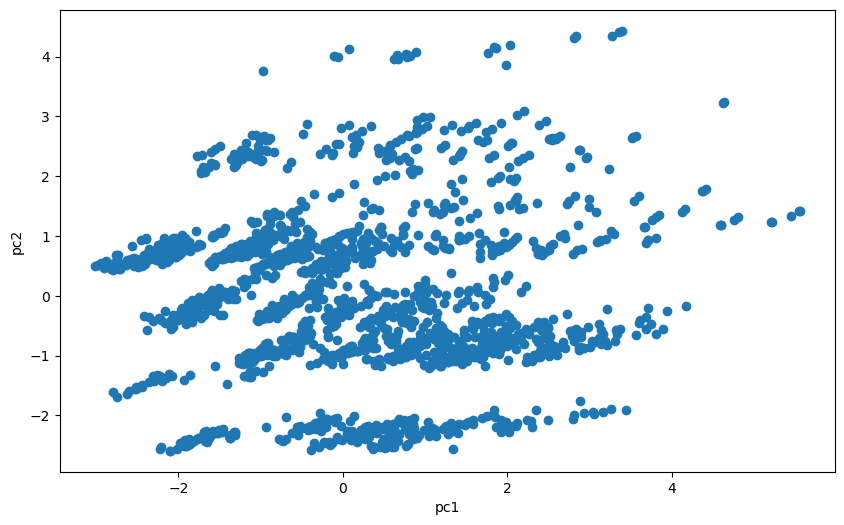

In [20]:
plt.figure(figsize=(10,6))
plt.scatter(pc1_df['pc1'],pc1_df['pc2'])
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.show()

# KMeans:

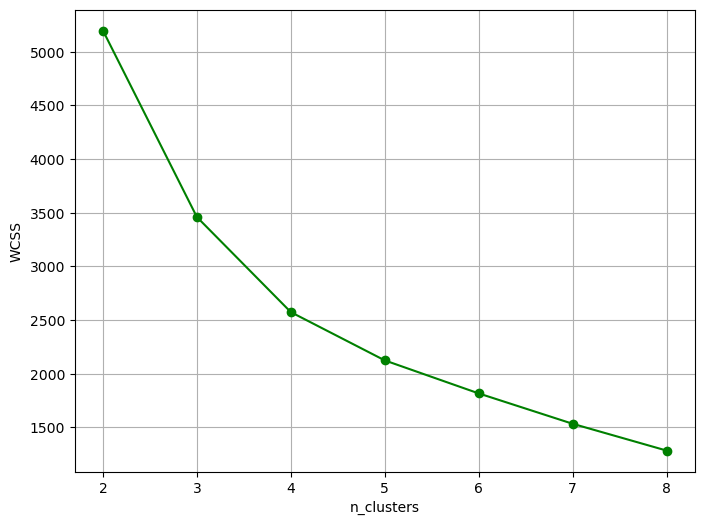

In [21]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
wcss=[]
s_c=[]
for i in range(2,9):
    km=KMeans(n_clusters=i,random_state=0)
    km.fit(pc1_df[['pc1','pc2']])
    wcss.append(km.inertia_)
    s_c.append(silhouette_score(pc1_df[['pc1','pc2']],km.labels_))
plt.figure(figsize=(8,6))
plt.plot([c for c in range(2,9)],wcss,color='green',marker='o')
plt.xlabel('n_clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()    

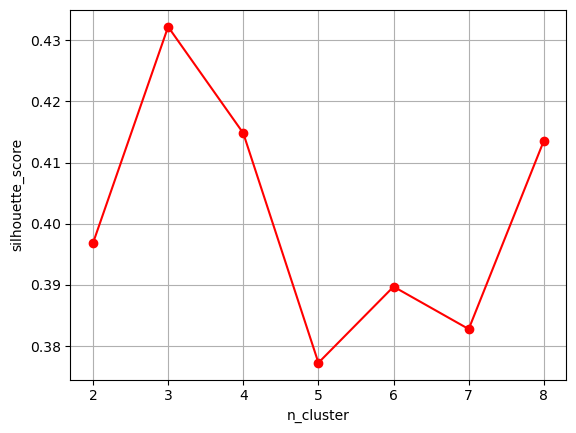

In [22]:
plt.plot([s for s in range(2,9)],s_c,color='red',marker='o')
plt.xlabel('n_cluster')
plt.ylabel('silhouette_score')
plt.grid()
plt.show()

In [23]:
km1=KMeans(n_clusters=3,random_state=0)
k_pre=km1.fit_predict(pc1_df[['pc1','pc2']])
k_pre

array([1, 2, 2, ..., 2, 2, 2])

In [24]:
pc2=pc1_df.copy()
pc2['cluster_id']=k_pre
pc2

,pc1,pc2,pc3,pc4,cluster_id
0,2.514746,0.834122,2.174806,1.217794,1
1,0.344935,0.598146,-2.211603,0.548385,2
2,-0.651063,-0.680093,2.280419,0.120675,2
3,1.714316,-0.579927,0.730731,-0.510753,0
4,1.626745,-0.440496,1.244909,-0.231808,0
...,...,...,...,...,...
1995,-0.866034,0.298330,1.438958,-0.945916,2
1996,-1.114957,0.794727,-1.079871,-0.736766,2
1997,-1.452298,-2.235937,0.896571,-0.131774,2
1998,-2.241453,0.627108,-0.530456,-0.042606,2


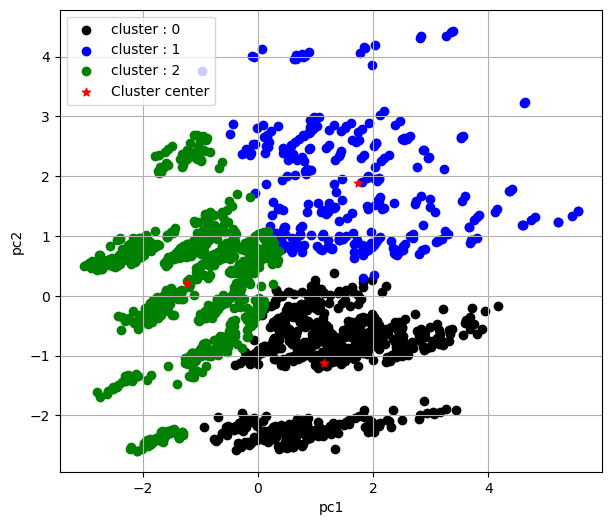

In [25]:
c0=pc2.loc[pc2['cluster_id']==0]
c1=pc2.loc[pc2['cluster_id']==1]
c2=pc2.loc[pc2['cluster_id']==2]
plt.figure(figsize=(7,6))
plt.scatter(c0['pc1'],c0['pc2'],color='black',label='cluster : 0')
plt.scatter(c1['pc1'],c1['pc2'],color='blue',label='cluster : 1')
plt.scatter(c2['pc1'],c2['pc2'],color='green',label='cluster : 2')
plt.scatter(km1.cluster_centers_[0:,0],km1.cluster_centers_[0:,1],color='red',marker='*',label='Cluster center')
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.legend()
plt.grid()
plt.show()

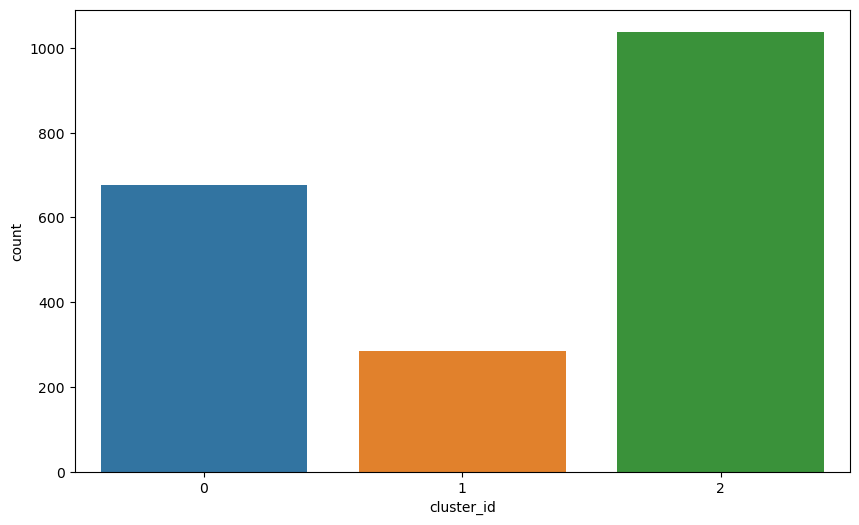

In [26]:
plt.figure(figsize=(10,6))
sns.countplot(x=pc2['cluster_id'])
plt.show()

## Features Comparison of the data points of different Clusters:

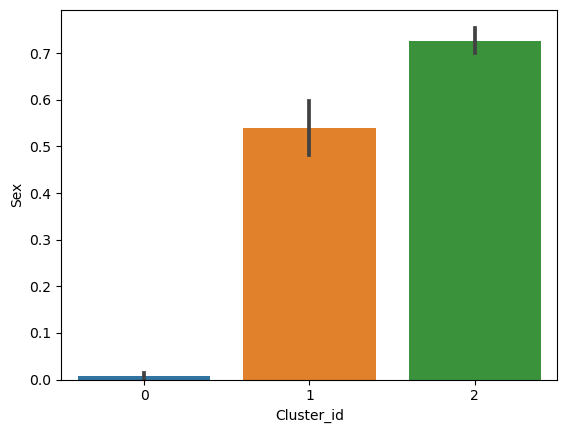

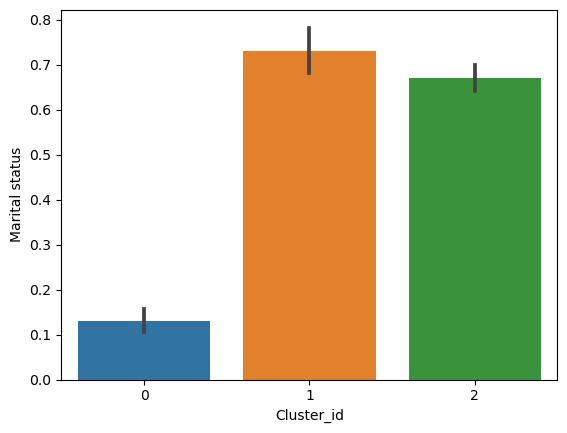

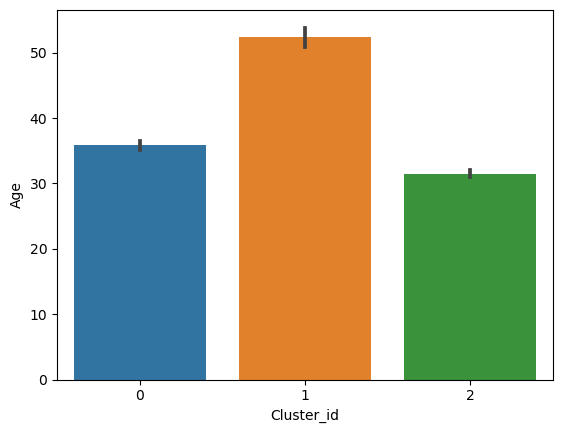

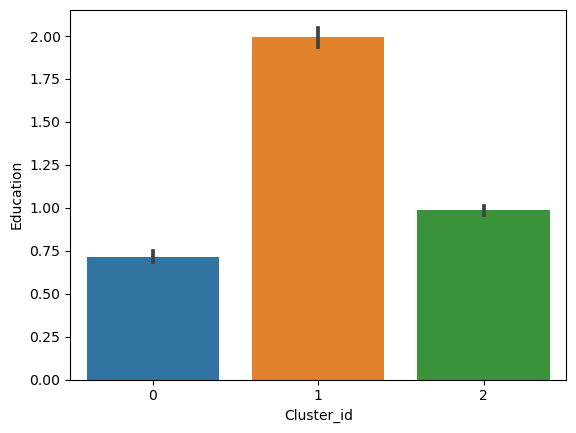

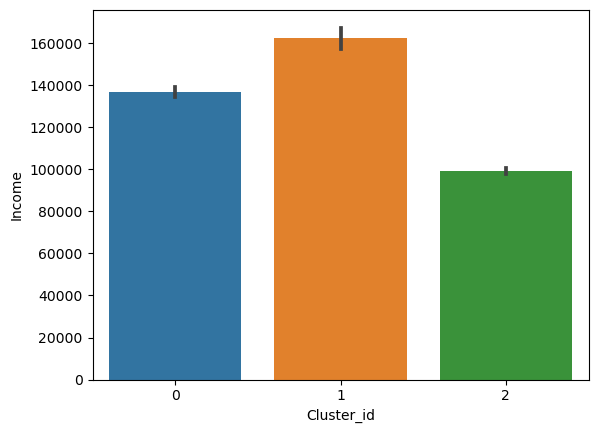

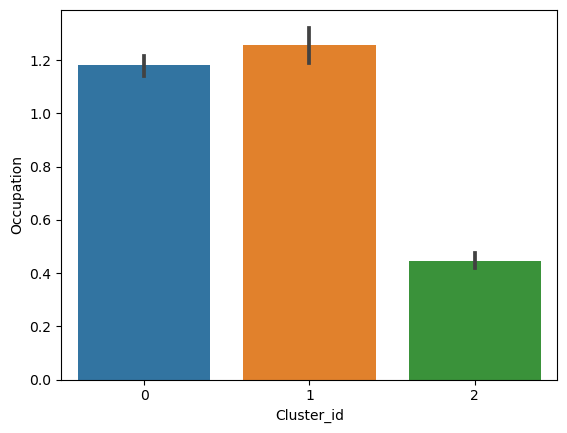

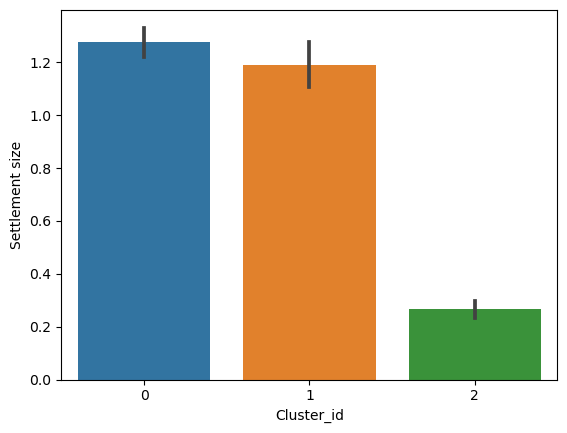

In [27]:
df4=df.copy()
df4['Cluster']=k_pre
for c in df4.iloc[:,0:-1].columns:
    sns.barplot(x=df4['Cluster'],y=df4[c])
    plt.xlabel('Cluster_id')
    plt.ylabel(c)
    plt.show()
        

# Agglumarative

In [28]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram

In [29]:
ag1=AgglomerativeClustering(n_clusters=None,distance_threshold=0)
c_pre=ag1.fit_predict(pc1_df[['pc1','pc2']])
c_pre

array([1131, 1249, 1215, ...,    3,    1,    0], dtype=int64)

In [30]:
plt.figure(figsize=(150,90))
l=hierarchy.linkage((ag1.children_))
dm=dendrogram(l,p=30,color_threshold=33)

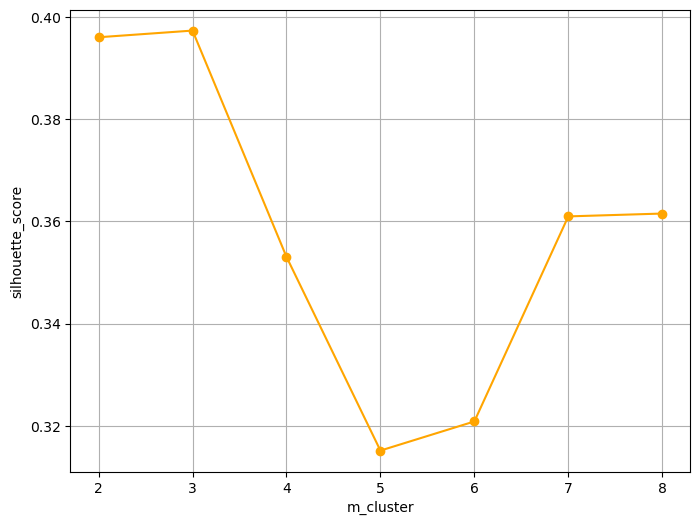

In [31]:
sc3=[]
for r in range(2,9):
    ag2=AgglomerativeClustering(n_clusters=r)
    ag2.fit(pc1_df[['pc1','pc2']])
    sc3.append(silhouette_score(pc1_df[['pc1','pc2']],ag2.labels_))
plt.figure(figsize=(8,6))
plt.plot([n for n in range(2,9)],sc3,color='orange',marker='o')
plt.xlabel('m_cluster')
plt.ylabel('silhouette_score')
plt.grid()
plt.show()
    

In [32]:
df5=df.copy()
pc3=pc1_df.copy()
ag3=AgglomerativeClustering(n_clusters=3)
ag_pre=ag3.fit_predict(pc1_df[['pc1','pc2']])
ag_pre

array([2, 0, 0, ..., 0, 0, 0], dtype=int64)

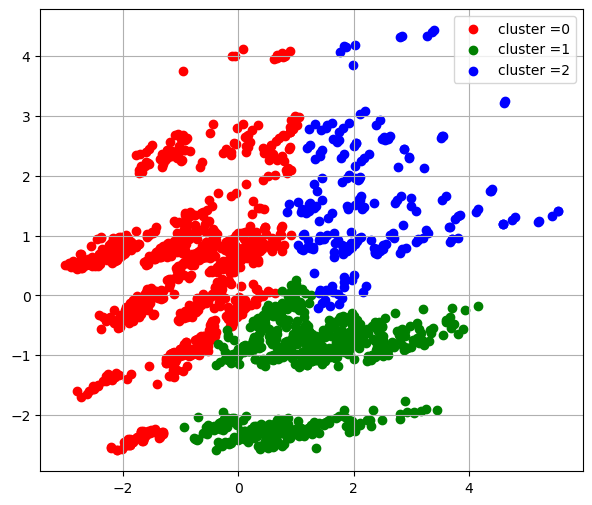

In [33]:
pc3['Cluster']=ag_pre
p_df=pc3.loc[pc3['Cluster']==0]
p_df1=pc3.loc[pc3['Cluster']==1]
p_df2=pc3.loc[pc3['Cluster']==2]
plt.figure(figsize=(7,6))
plt.scatter(p_df['pc1'],p_df['pc2'],color='red',label='cluster =0')
plt.scatter(p_df1['pc1'],p_df1['pc2'],color='green',label='cluster =1')
plt.scatter(p_df2['pc1'],p_df2['pc2'],color='blue',label='cluster =2')
plt.legend()
plt.grid()
plt.show()

## Total number of data points in both clusters:

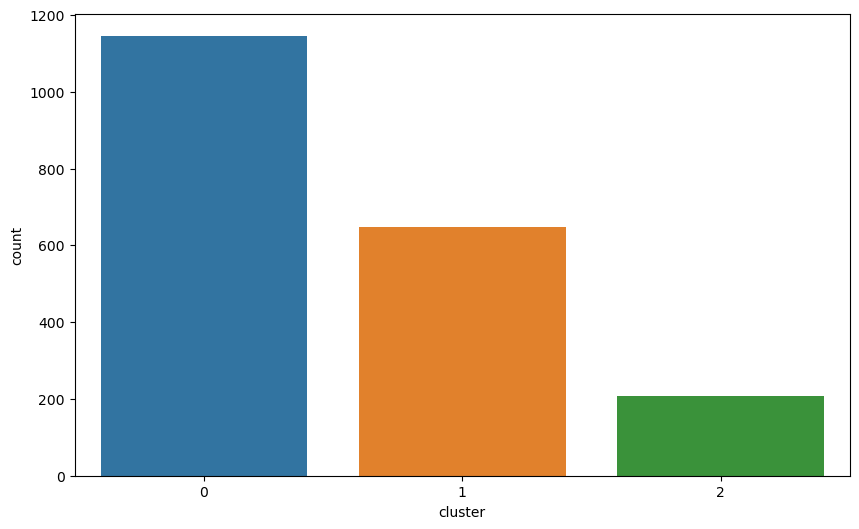

In [34]:
df5['cluster']=ag_pre
plt.figure(figsize=(10,6))
sns.countplot(x=df5['cluster'])
plt.show()

## Features Comparison of the data points of different Clusters:

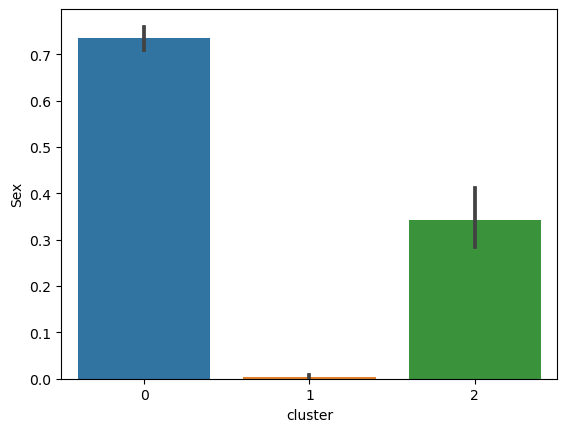

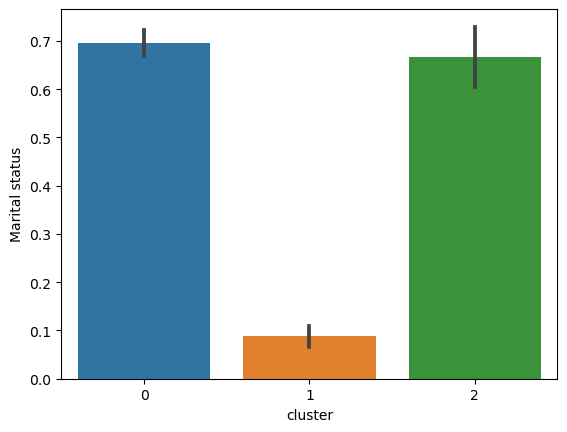

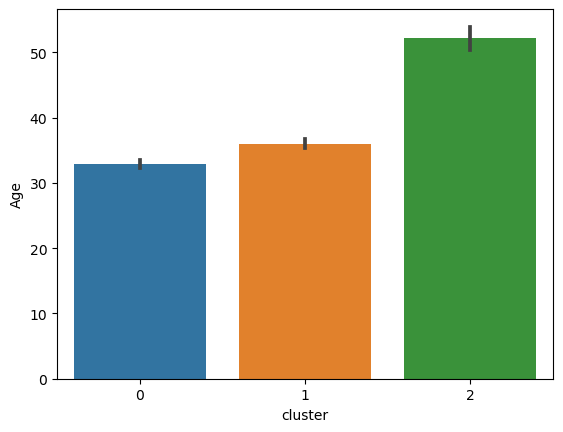

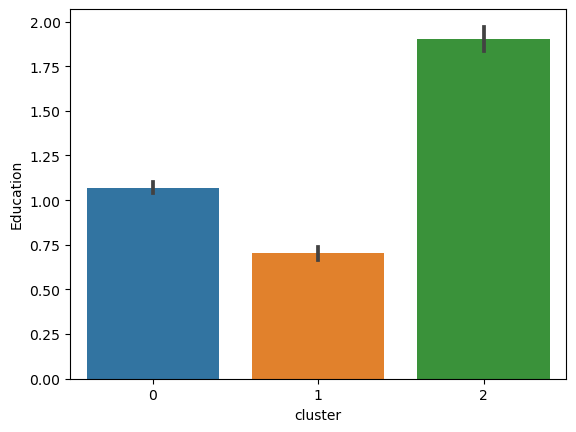

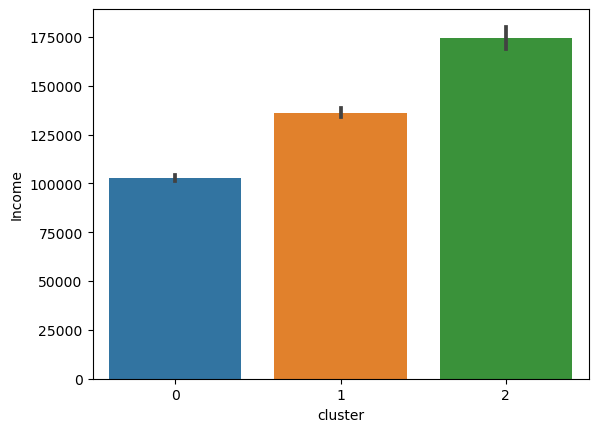

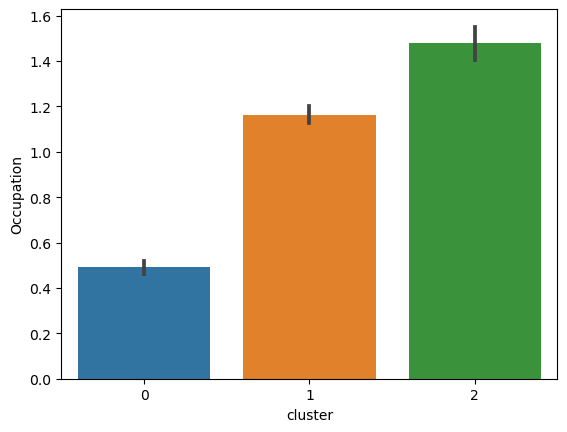

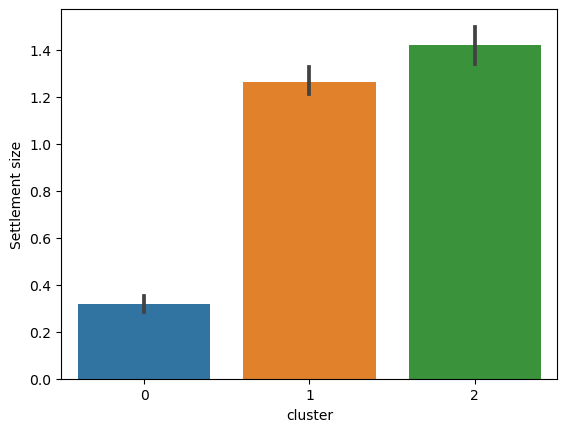

In [35]:
for i in df5.iloc[:,0:-1].columns:
    sns.barplot(x=df5['cluster'],y=df5[i])
    plt.xlabel('cluster')
    plt.ylabel(i)
    plt.show()

# DBSCAN

In [36]:
from sklearn.cluster import DBSCAN
par=[]
sc_sc1=[]
for i in np.linspace(0.1,1.2,10):
    for m in range(5,30,1):
        db=DBSCAN(eps=i,min_samples=m)
        db.fit(pc1_df[['pc1','pc2']])
        par.append(['eps = ',i,' min_sample = ',m])
        sc_sc1.append(silhouette_score(pc1_df[['pc1','pc2']],db.labels_))
print('Best parameters are .........')
print()
print(par[sc_sc1.index(max(sc_sc1))])
print('silhouette_score = {}'.format(max(sc_sc1)))

Best parameters are .........

['eps = ', 1.0777777777777777, ' min_sample = ', 11]
silhouette_score = 0.516149151321788


In [37]:
db2=DBSCAN(eps=1.0777777777777777,min_samples=11)
db_pre=db2.fit_predict(pc1_df[['pc1','pc2']])
db_pre

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [38]:
silhouette_score(pc1_df[['pc1','pc2']],db2.labels_)

0.516149151321788

2


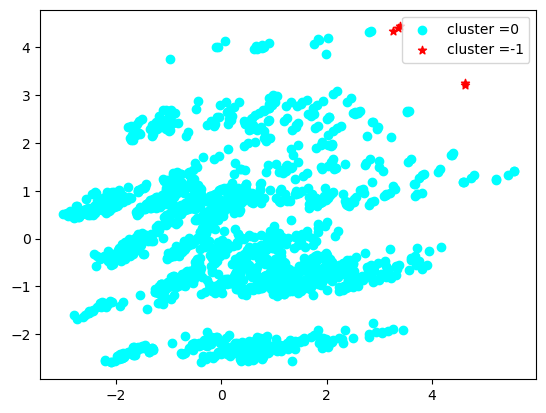

In [39]:
df6=df.copy()
pcc=pc1_df.copy()
pcc['cluster']=db_pre
print(pcc['cluster'].nunique())
DB=pcc.loc[pcc['cluster']==0]
DB1=pcc.loc[pcc['cluster']==-1]
plt.scatter(DB['pc1'],DB['pc2'],color='cyan',label='cluster =0')
plt.scatter(DB1['pc1'],DB1['pc2'],color='red',label='cluster =-1',marker='*')
plt.legend()
plt.show()

In [40]:
df6['Cluster']=db_pre

## Total number of data points in both clusters:

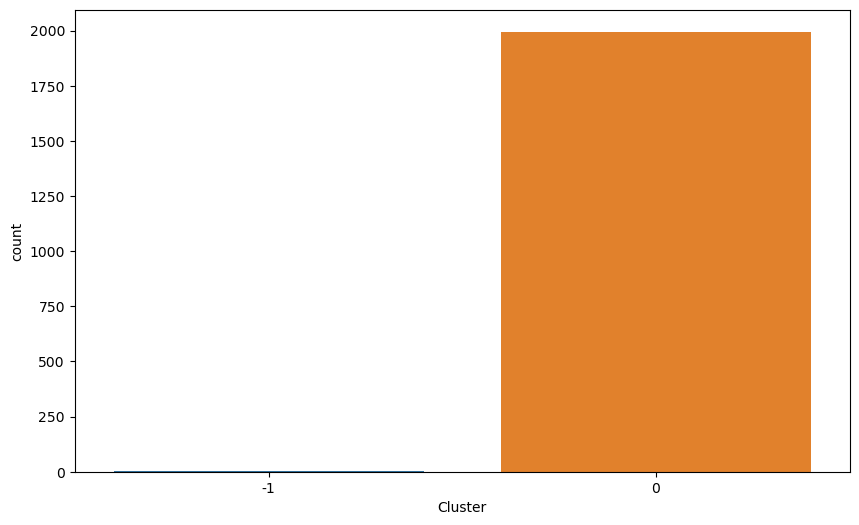

In [41]:
plt.figure(figsize=(10,6))
sns.countplot(x=df6['Cluster'])
plt.show()

## Features Comparison of the data points of different Clusters:

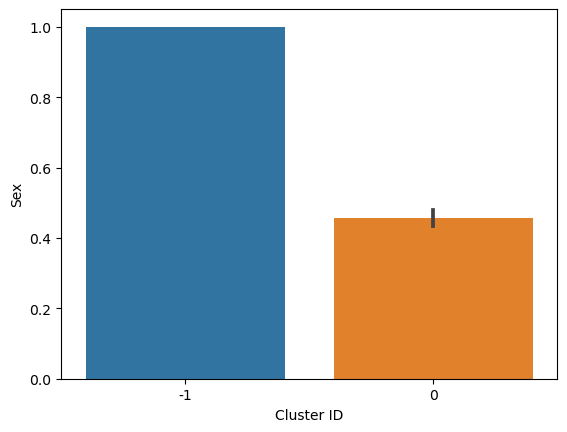

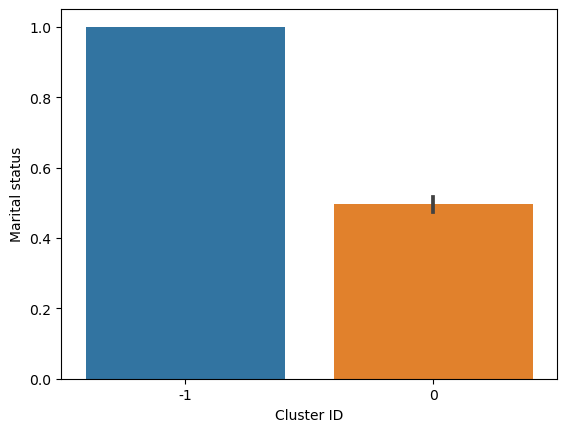

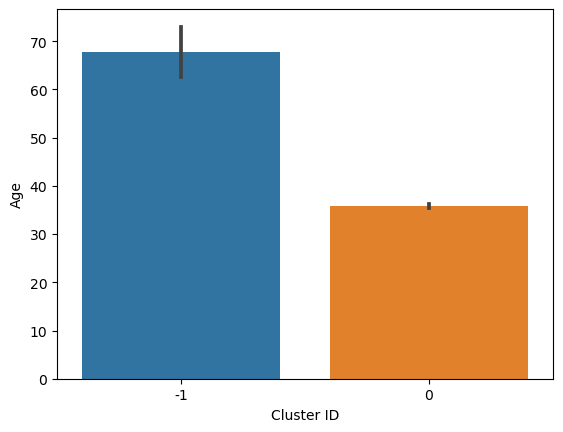

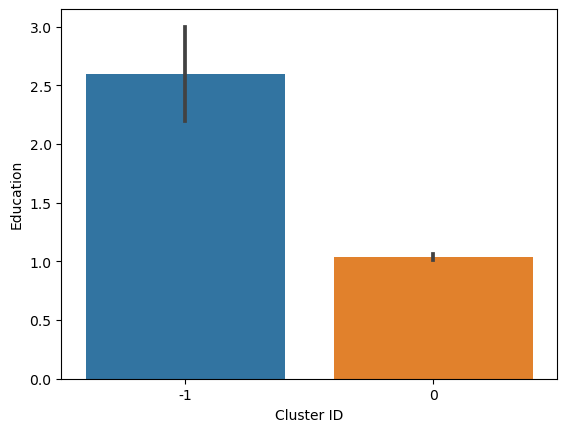

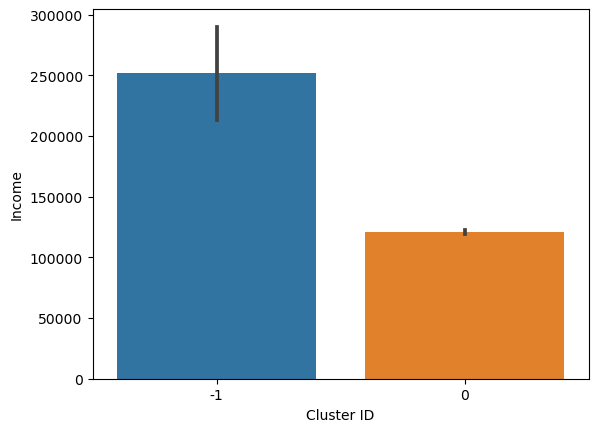

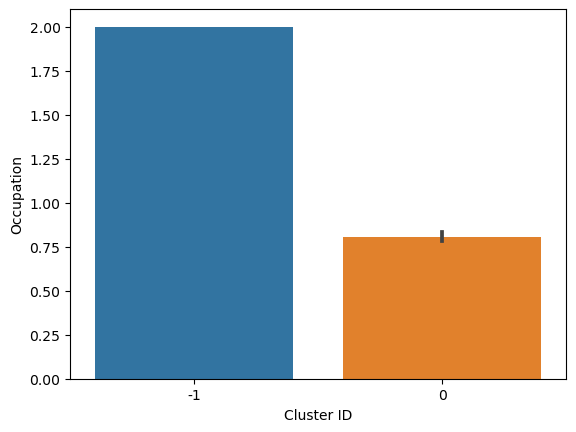

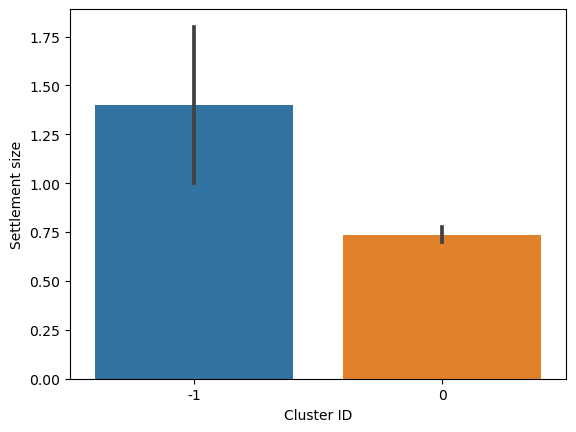

In [42]:
for c in df6.iloc[:,0:-1].columns:
    sns.barplot(x=df6['Cluster'],y=df6[c])
    plt.xlabel('Cluster ID')
    plt.ylabel(c)
    plt.show()

In [43]:
'''                                           Thank you                                            '''

'                                           Thank you                                            '